In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy import stats
from sklearn import svm
from sklearn.covariance import EllipticEnvelope

In [3]:
# Example settings
n_samples = 400
outliers_fraction = 0.05
clusters_separation = [0, 1, 2]
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))


In [4]:
# 正常データと異常データの生成
n_inliers = int((1.0 - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = 0


In [ ]:
np.random.randn(2,3)

/tmp/ipykernel_192455/584879782.py:46: UserWarning: The following kwargs were not used by contour: 'color'
  subplot.contourf(
/tmp/ipykernel_192455/584879782.py:67: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0], b, c],
/tmp/ipykernel_192455/584879782.py:46: UserWarning: The following kwargs were not used by contour: 'color'
  subplot.contourf(
/tmp/ipykernel_192455/584879782.py:67: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0], b, c],
/tmp/ipykernel_192455/584879782.py:46: UserWarning: The following kwargs were not used by contour: 'color'
  subplot.contourf(
/tmp/ipykernel_192455/584879782.py:67: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0], b, c],
/tmp/ipykerne

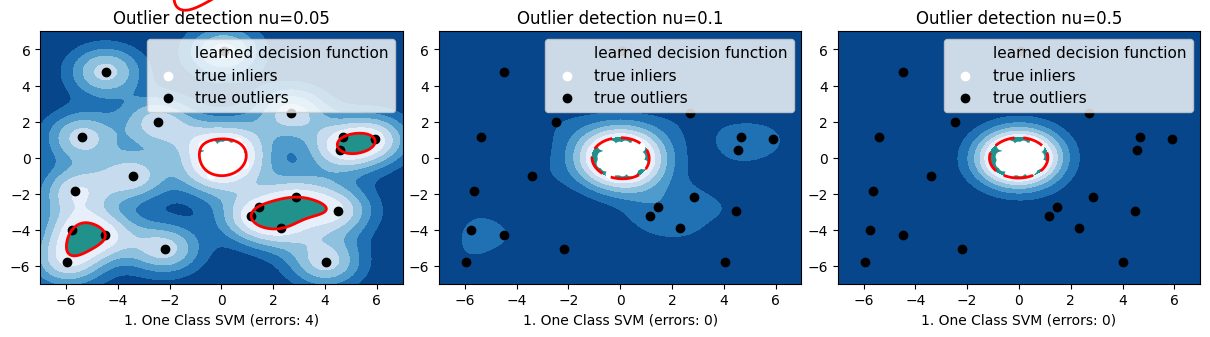

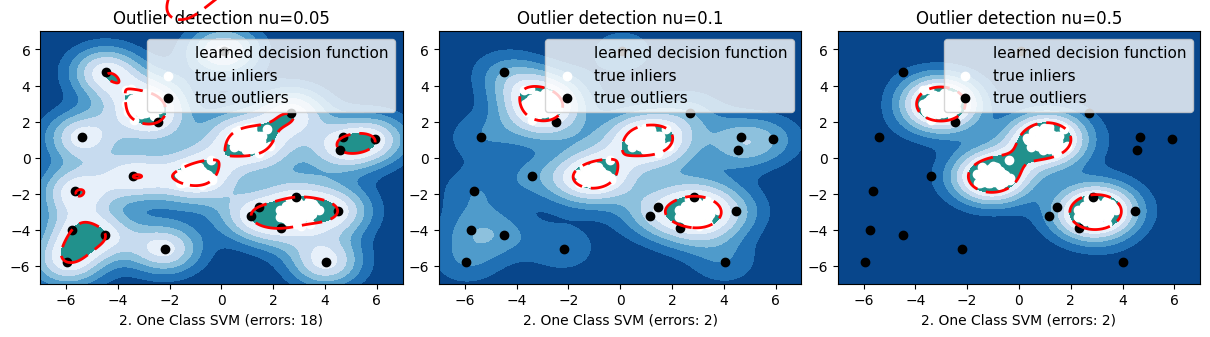

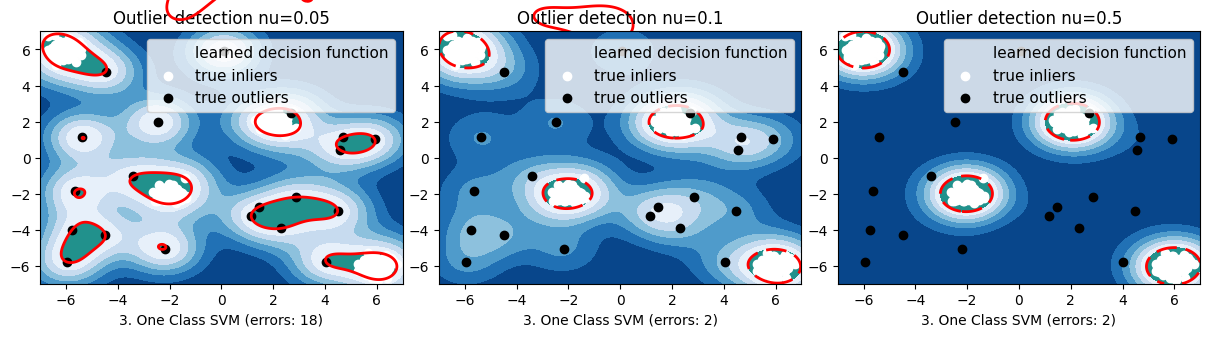

In [12]:
# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
    rng = np.random.default_rng(42)
    x1 = rng.normal(loc=-offset, scale=0.3, size=(int(0.25 * n_inliers), 2))
    x2 = rng.normal(loc=+offset, scale=0.3, size=(int(0.25 * n_inliers), 2))

    x3 = np.c_[
        rng.normal(loc=-3 * offset, scale=0.3, size=(int(0.25 * n_inliers), 1)),
        rng.normal(loc=+3 * offset, scale=0.3, size=(int(0.25 * n_inliers), 1))
    ]

    x4 = np.c_[
        rng.normal(loc=+3 * offset, scale=0.3, size=(int(0.25 * n_inliers), 1)),
        rng.normal(loc=-3 * offset, scale=0.3, size=(int(0.25 * n_inliers), 1))
    ]

    x = np.r_[x1, x2, x3, x4]
    x = np.r_[x, rng.uniform(low=-6, high=6, size=(n_outliers, 2))]

    plt.figure(figsize=(10, 12))

    nu_l = [0.05, 0.1, 0.5]
    for j, nu in enumerate(nu_l):
        clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma="auto")
        clf.fit(x)
        y_pred = clf.decision_function(x).ravel()
        threshold = stats.scoreatpercentile(y_pred, 100 * outliers_fraction)
        y_pred_tf = y_pred > threshold
        n_errors = (y_pred_tf != ground_truth).sum()

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(3, 3, i * 3 + j + 1)
        subplot.set_title("Outlier detection nu=%s" % nu)
        # 予想結果
        subplot.contourf(
            xx,
            yy,
            Z,
            levels=np.linspace(Z.min(), threshold, 7),
            cmap=plt.cm.Blues_r
        )
        # 超平面
        a = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors="red")
        # 正常範囲
        subplot.contourf(
            xx,
            yy,
            Z,
            levels=[threshold, Z.max()],
            color="orange",
        )
        # 正常データ
        b = subplot.scatter(
            x[:-n_outliers, 0],
            x[:-n_outliers, 1],
            color="white",
        )
        # 異常データ
        c = subplot.scatter(
            x[-n_outliers:, 0],
            x[-n_outliers:, 1],
            color="black",
        )
        subplot.axis("tight")
        subplot.legend(
            [a.collections[0], b, c],
            ["learned decision function", "true inliers", "true outliers"],
            prop=matplotlib.font_manager.FontProperties(size=11),
        )
        subplot.set_xlabel(f"{i + 1}. One Class SVM (errors: {n_errors})")
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
        plt.subplots_adjust(0.04, 0.1, 1.2, 0.84, 0.1, 0.26)
plt.show()

/tmp/ipykernel_192455/978502913.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0], b, c],
/tmp/ipykernel_192455/978502913.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0], b, c],
/tmp/ipykernel_192455/978502913.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0], b, c],
/tmp/ipykernel_192455/978502913.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0], b, c],
/tmp/ipykernel_192455/978502913.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0

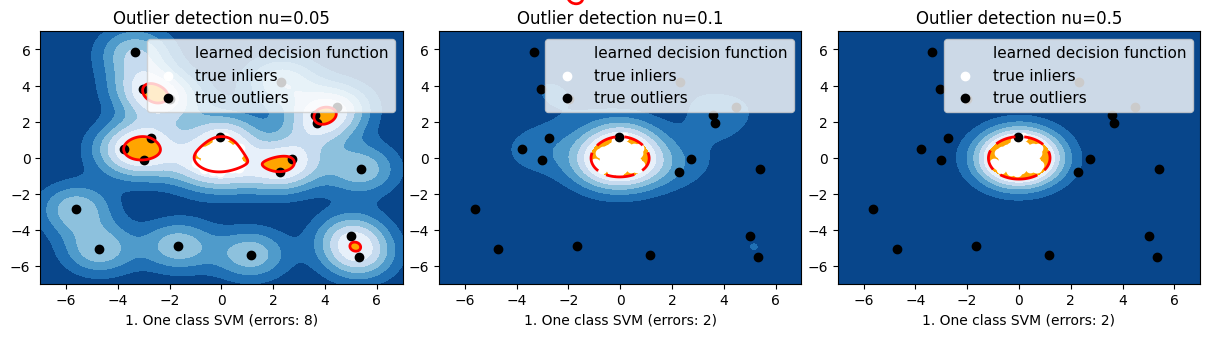

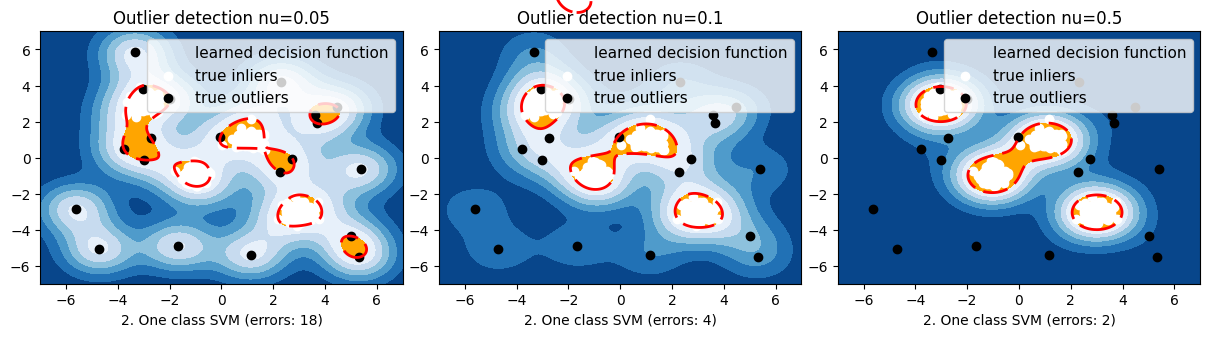

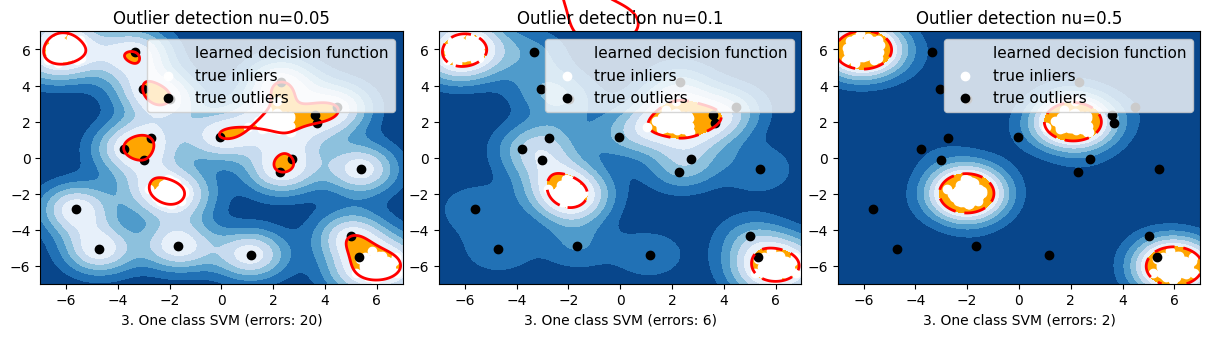

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from scipy import stats

from sklearn import svm
from sklearn.covariance import EllipticEnvelope

# Example settings
n_samples = 400 # 標本数
outliers_fraction = 0.05 # 全標本数のうち、異常データの割合
clusters_separation = [0, 1, 2]
# ２次元作図用格子状データの生成
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))

# 正常データと異常データの生成
n_inliers = int((1. - outliers_fraction) * n_samples) # 正常データの標本数
n_outliers = int(outliers_fraction * n_samples) # 異常データの標本数
ground_truth = np.ones(n_samples, dtype=int) # ラベルデータ
ground_truth[-n_outliers:] = 0

# Fit the problem with varying cluster separation
# [enumerate関数](http://python.civic-apps.com/zip-enumerate/)はインデックスとともにループする
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # 正常データ生成
    X1 = 0.3 * np.random.randn(int( 0.25 * n_inliers ), 2) - offset # 正規分布 N(μ= -offset, σ=0.3)
    X2 = 0.3 * np.random.randn(int( 0.25 * n_inliers ), 2) + offset # 正規分布 N(μ= +offset, σ=0.3)

    X3 = np.c_[
            0.3 * np.random.randn(int( 0.25 * n_inliers ), 1) - 3*offset, # 正規分布 N(μ= -3*offset, σ=0.3)
            0.3 * np.random.randn(int( 0.25 * n_inliers ), 1) + 3*offset  # 正規分布 N(μ= +3*offset, σ=0.3)
        ]

    X4 = np.c_[
            0.3 * np.random.randn(int( 0.25 * n_inliers ), 1) + 3*offset, # 正規分布 N(μ= +3*offset, σ=0.3)
            0.3 * np.random.randn(int( 0.25 * n_inliers ), 1) - 3*offset  # 正規分布 N(μ= -3*offset, σ=0.3)
        ]

    X = np.r_[X1, X2, X3, X4] # 行で結合
    # 外れ値データ生成
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))] # 一様分布 -6 <= X <= +6

        # Fit the model with the One-Class SVM
    plt.figure(figsize=(10, 12))
    # 外れ値検知のツール、１クラスSVMとRobust Covariance Estimator
#    classifiers = {
#    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
#                                     kernel="rbf", gamma=0.1),
#    "robust covariance estimator": EllipticEnvelope(contamination=.1)} # 共分散推定
    nu_l = [0.05, 0.1, 0.5]
    for j, nu in enumerate(nu_l):
#    clf = svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.1)
        clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma='auto')
        clf.fit(X)
        y_pred = clf.decision_function(X).ravel() # 各データの超平面との距離、ravel()で配列を1D化
        threshold = stats.scoreatpercentile(y_pred, 100 * outliers_fraction) # パーセンタイルで異常判定の閾値設定
        y_pred = y_pred > threshold
        n_errors = (y_pred != ground_truth).sum() # 誤判定の数

        # plot the levels lines and the points
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 格子状に超平面との距離を出力
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(3, 3,i*3+j+1)
        subplot.set_title("Outlier detection nu=%s" % nu)
        # 予測結果
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)
        # 超平面
        a = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')
        # 正常範囲
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')
        # 正常データ
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white')
        # 異常データ
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=11))
    #    subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlabel("%d. One class SVM (errors: %d)" % (i+1, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
        plt.subplots_adjust(0.04, 0.1, 1.2, 0.84, 0.1, 0.26)

plt.show()
